In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin-1')

In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df.info()  # Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [15]:
df.describe()  # Statistical Description

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [16]:
# Checking missing values
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


## Total sales by Product Line:

In [39]:
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print("Total Sales by Product Line:")
sales_by_product

Total Sales by Product Line:


,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57
Ships,714437.13
Trains,226243.47


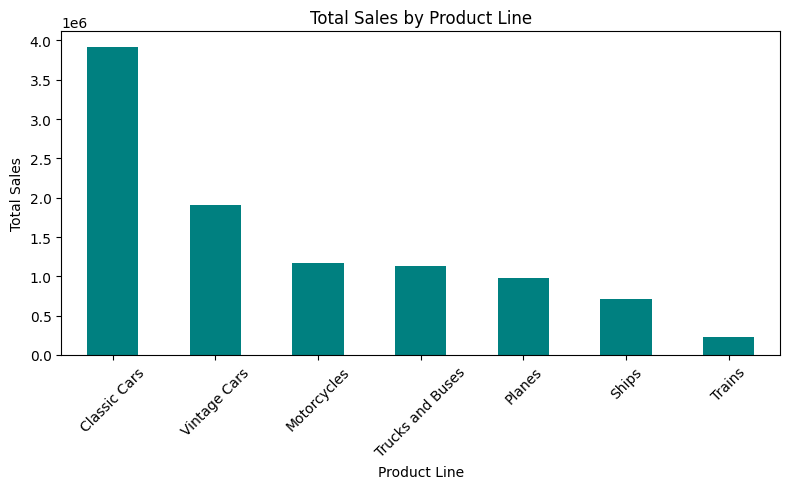

In [22]:
# Visualization
plt.figure(figsize=(8,5))
sales_by_product.plot(kind='bar', color='teal')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by Country:

In [38]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("Total Sales by Country:")
sales_by_country

Total Sales by Country:


,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


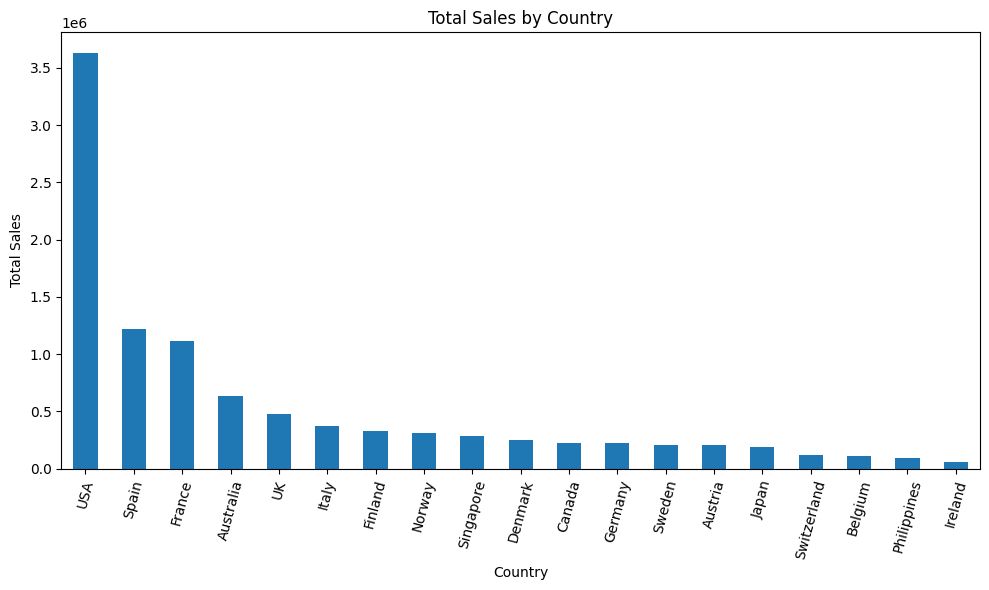

In [25]:
# Visualization
plt.figure(figsize=(10,6))
sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

## Top 10 Customers by Sales:

In [32]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().nlargest(10)
top_customers

,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
"Dragon Souveniers, Ltd.",172989.68
Land of Toys Inc.,164069.44
The Sharp Gifts Warehouse,160010.27
"AV Stores, Co.",157807.81


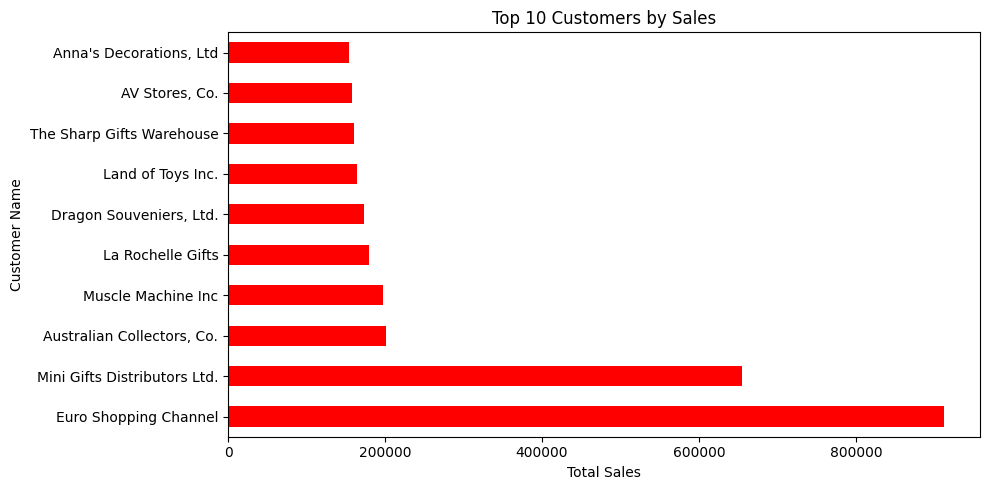

In [37]:
# Visualization
plt.figure(figsize=(10,5))
top_customers.plot(kind='barh', color='red')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

## Monthly Sales Trend

In [26]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['MONTH'] = df['ORDERDATE'].dt.to_period('M')

In [27]:
monthly_sales = df.groupby('MONTH')['SALES'].sum()
print("\n🔹 Monthly Sales Trend:")
monthly_sales


🔹 Monthly Sales Trend:


,SALES
MONTH,
2003-01,129753.60
2003-02,140836.19
2003-03,174504.90
2003-04,201609.55
2003-05,192673.11
2003-06,168082.56
2003-07,187731.88
2003-08,197809.30
2003-09,263973.36


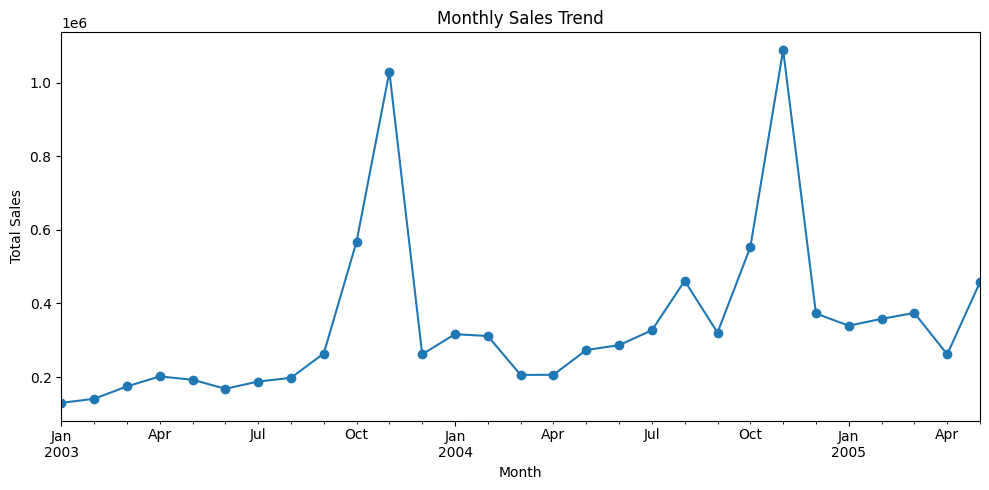

In [28]:
# Visualization
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Correlation Analysis:

In [29]:
print("Correlation Matrix:")
print(df.corr(numeric_only=True))

Correlation Matrix:
                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938        -0.057367   
MSRP               -0.010280         0.017881   0.670625        -0.021067   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010280  
QUANTITYORDERED  0.551426 -0.035323 -0.039048  0.069535  0.017881  
PRICE

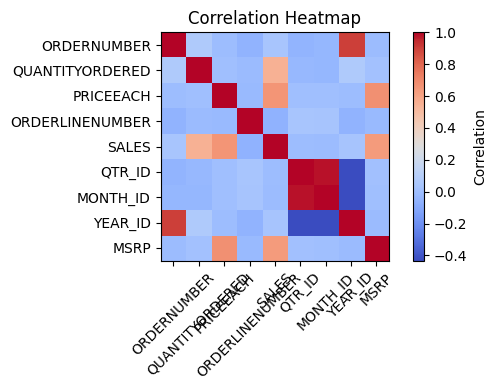

In [30]:
plt.figure(figsize=(6,4))
plt.imshow(df.corr(numeric_only=True), cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(range(len(df.corr(numeric_only=True).columns)), df.corr(numeric_only=True).columns, rotation=45)
plt.yticks(range(len(df.corr(numeric_only=True).columns)), df.corr(numeric_only=True).columns)
plt.tight_layout()
plt.show()